## Step 1: Define the Problem

### 1. Objective
The goal of this project is to develop a machine learning model to predict the **obesity risk** in individuals based on various attributes. Obesity is a critical factor related to cardiovascular diseases, making early prediction essential for preventive healthcare.

### 2. Attributes
The dataset consists of multiple attributes categorized into three main groups:

#### a) **Personal Attributes**
- **Gender**: Biological sex of the individual.
- **Height**: Height of the person (in meters).
- **Age**: Age of the individual.
- **Weight**: Current body weight (in kg).
- **Family history with overweight**: Whether there is a genetic predisposition to overweight.
- **Smoking habit (SMOKE)**: Whether the person smokes or not.

#### b) **Eating Habits**
- **Frequent consumption of high caloric food (FAVC)**: Whether the person regularly consumes high-calorie foods.
- **Frequency of consumption of vegetables (FCVC)**: How often the individual eats vegetables.
- **Number of main meals (NCP)**: Daily number of main meals consumed.
- **Consumption of food between meals (CAEC)**: Snacking habits between meals.
- **Consumption of water daily (CH2O)**: Amount of water intake per day.
- **Consumption of alcohol (CALC)**: Frequency of alcohol consumption.

#### c) **Physical Condition**
- **Calorie consumption monitoring (SCC)**: Whether the person actively monitors their calorie intake.
- **Physical activity frequency (FAF)**: Regularity of physical activity.
- **Time using technology devices (TUE)**: Duration spent using electronic devices daily.
- **Transportation used (MTRANS)**: Mode of transportation used (e.g., walking, cycling, public transport, car).

#### d) **Target Variable**
- **NObeyesdad**: Obesity classification of the individual.
#### BMI Categories

| Category            | BMI Range      |
|---------------------|---------------|
| **Insufficient Weight** | Less than 18.5 |
| **Normal**         | 18.5 to 24.9  |
| **Overweight**     | 25.0 to 29.9  |
| **Obesity I**      | 30.0 to 34.9  |
| **Obesity II**     | 35.0 to 39.9  |
| **Obesity III**    | Higher than 40 |


### 3. Business Impact
By accurately predicting obesity risk, the model can assist healthcare providers, policymakers, and individuals in making informed decisions about lifestyle changes and early interventions. This can lead to reduced healthcare costs and improved public health outcomes.


## Step 2: Data load & Exploratory Data Analysis (EDA)


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [144]:
data = pd.read_csv('/content/train.csv')
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [145]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [146]:
print(data.describe())

                id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.

In [147]:
data.duplicated().sum()

np.int64(0)

In [148]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [149]:
data_cat = data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in data_cat:
    print(f'{col}: {data[col].unique()}')

Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [150]:
data_num = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(data_num)

['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [151]:
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
print(correlation_matrix)

              id       Age    Height    Weight      FCVC       NCP      CH2O  \
id      1.000000  0.007634  0.012041  0.014020  0.002098 -0.000332  0.007917   
Age     0.007634  1.000000 -0.011713  0.283381  0.034414 -0.048479 -0.016325   
Height  0.012041 -0.011713  1.000000  0.416677 -0.071546  0.191383  0.183706   
Weight  0.014020  0.283381  0.416677  1.000000  0.245682  0.095947  0.317914   
FCVC    0.002098  0.034414 -0.071546  0.245682  1.000000  0.113349  0.101299   
NCP    -0.000332 -0.048479  0.191383  0.095947  0.113349  1.000000  0.080949   
CH2O    0.007917 -0.016325  0.183706  0.317914  0.101299  0.080949  1.000000   
FAF     0.016719 -0.192259  0.295278 -0.084845 -0.089822  0.100871  0.082932   
TUE     0.007667 -0.296154  0.076433 -0.086471 -0.147843  0.067459 -0.010654   

             FAF       TUE  
id      0.016719  0.007667  
Age    -0.192259 -0.296154  
Height  0.295278  0.076433  
Weight -0.084845 -0.086471  
FCVC   -0.089822 -0.147843  
NCP     0.100871  0.06745

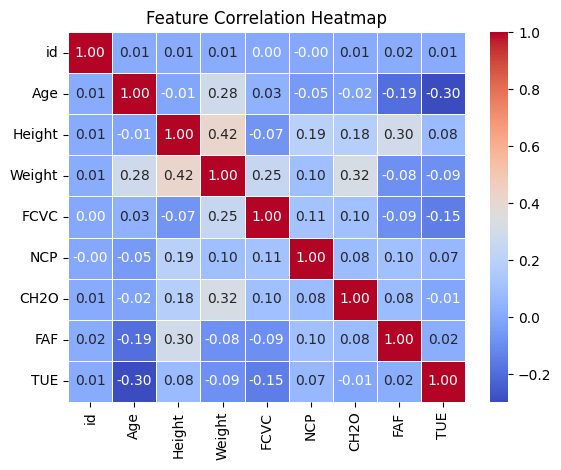

In [152]:
# Set figure size
plt.figure()
# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [153]:
# Set a correlation threshold
threshold = 0.25

# Find pairs with high correlation
high_correlation = correlation_matrix[abs(correlation_matrix) > threshold]

# Convert to long format and reset index
filtered_correlation = high_correlation.stack().reset_index()
filtered_correlation.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations
filtered_correlation = filtered_correlation[filtered_correlation['Feature 1'] != filtered_correlation['Feature 2']]

# Sort values to remove duplicate pairs (e.g., 'Weight-Height' and 'Height-Weight')
filtered_correlation['Sorted Pair'] = filtered_correlation.apply(lambda x: tuple(sorted([x['Feature 1'], x['Feature 2']])), axis=1)
filtered_correlation = filtered_correlation.drop_duplicates(subset=['Sorted Pair']).drop(columns=['Sorted Pair'])

# Display final filtered correlations
print(filtered_correlation.sort_values(by='Correlation', ascending=False))


   Feature 1 Feature 2  Correlation
5     Height    Weight     0.416677
10    Weight      CH2O     0.317914
6     Height       FAF     0.295278
2        Age    Weight     0.283381
3        Age       TUE    -0.296154


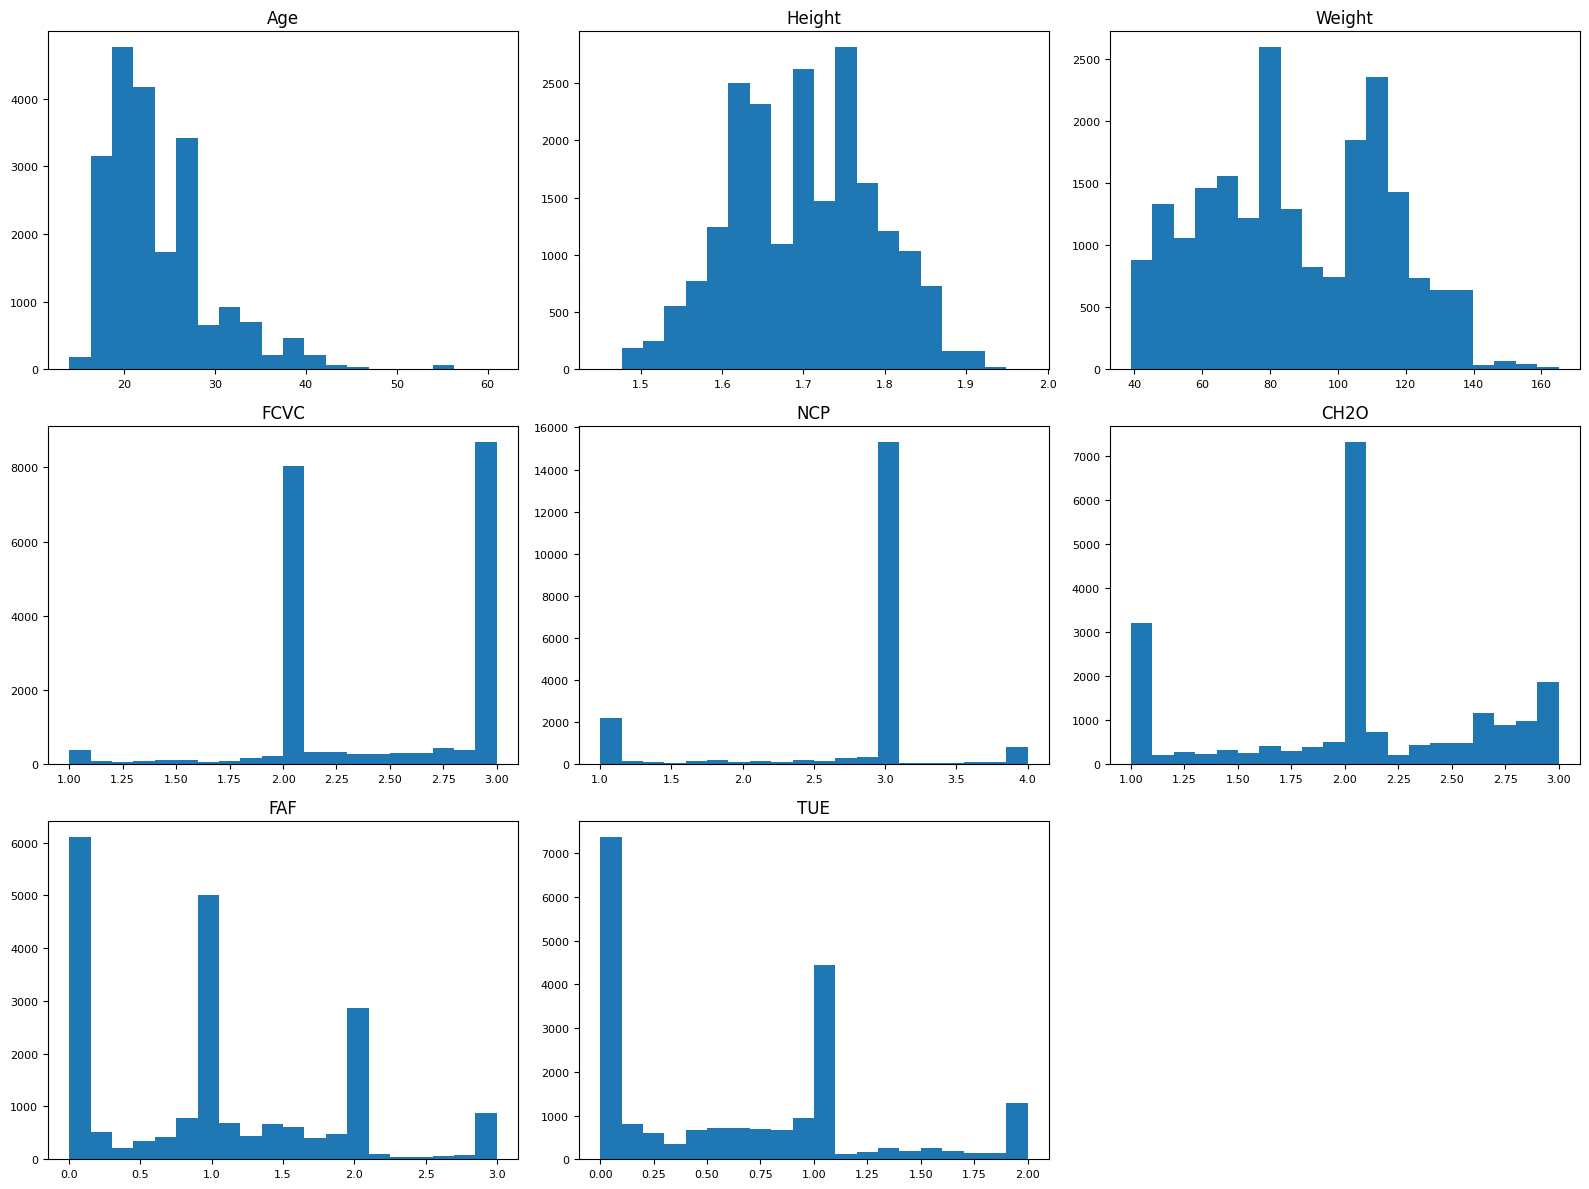

In [154]:
numerical_features = data.select_dtypes(include=['float64']).columns

data[numerical_features].hist(figsize=(16, 12), bins=20, xlabelsize=8, ylabelsize=8,grid=False)
plt.tight_layout()
plt.show()


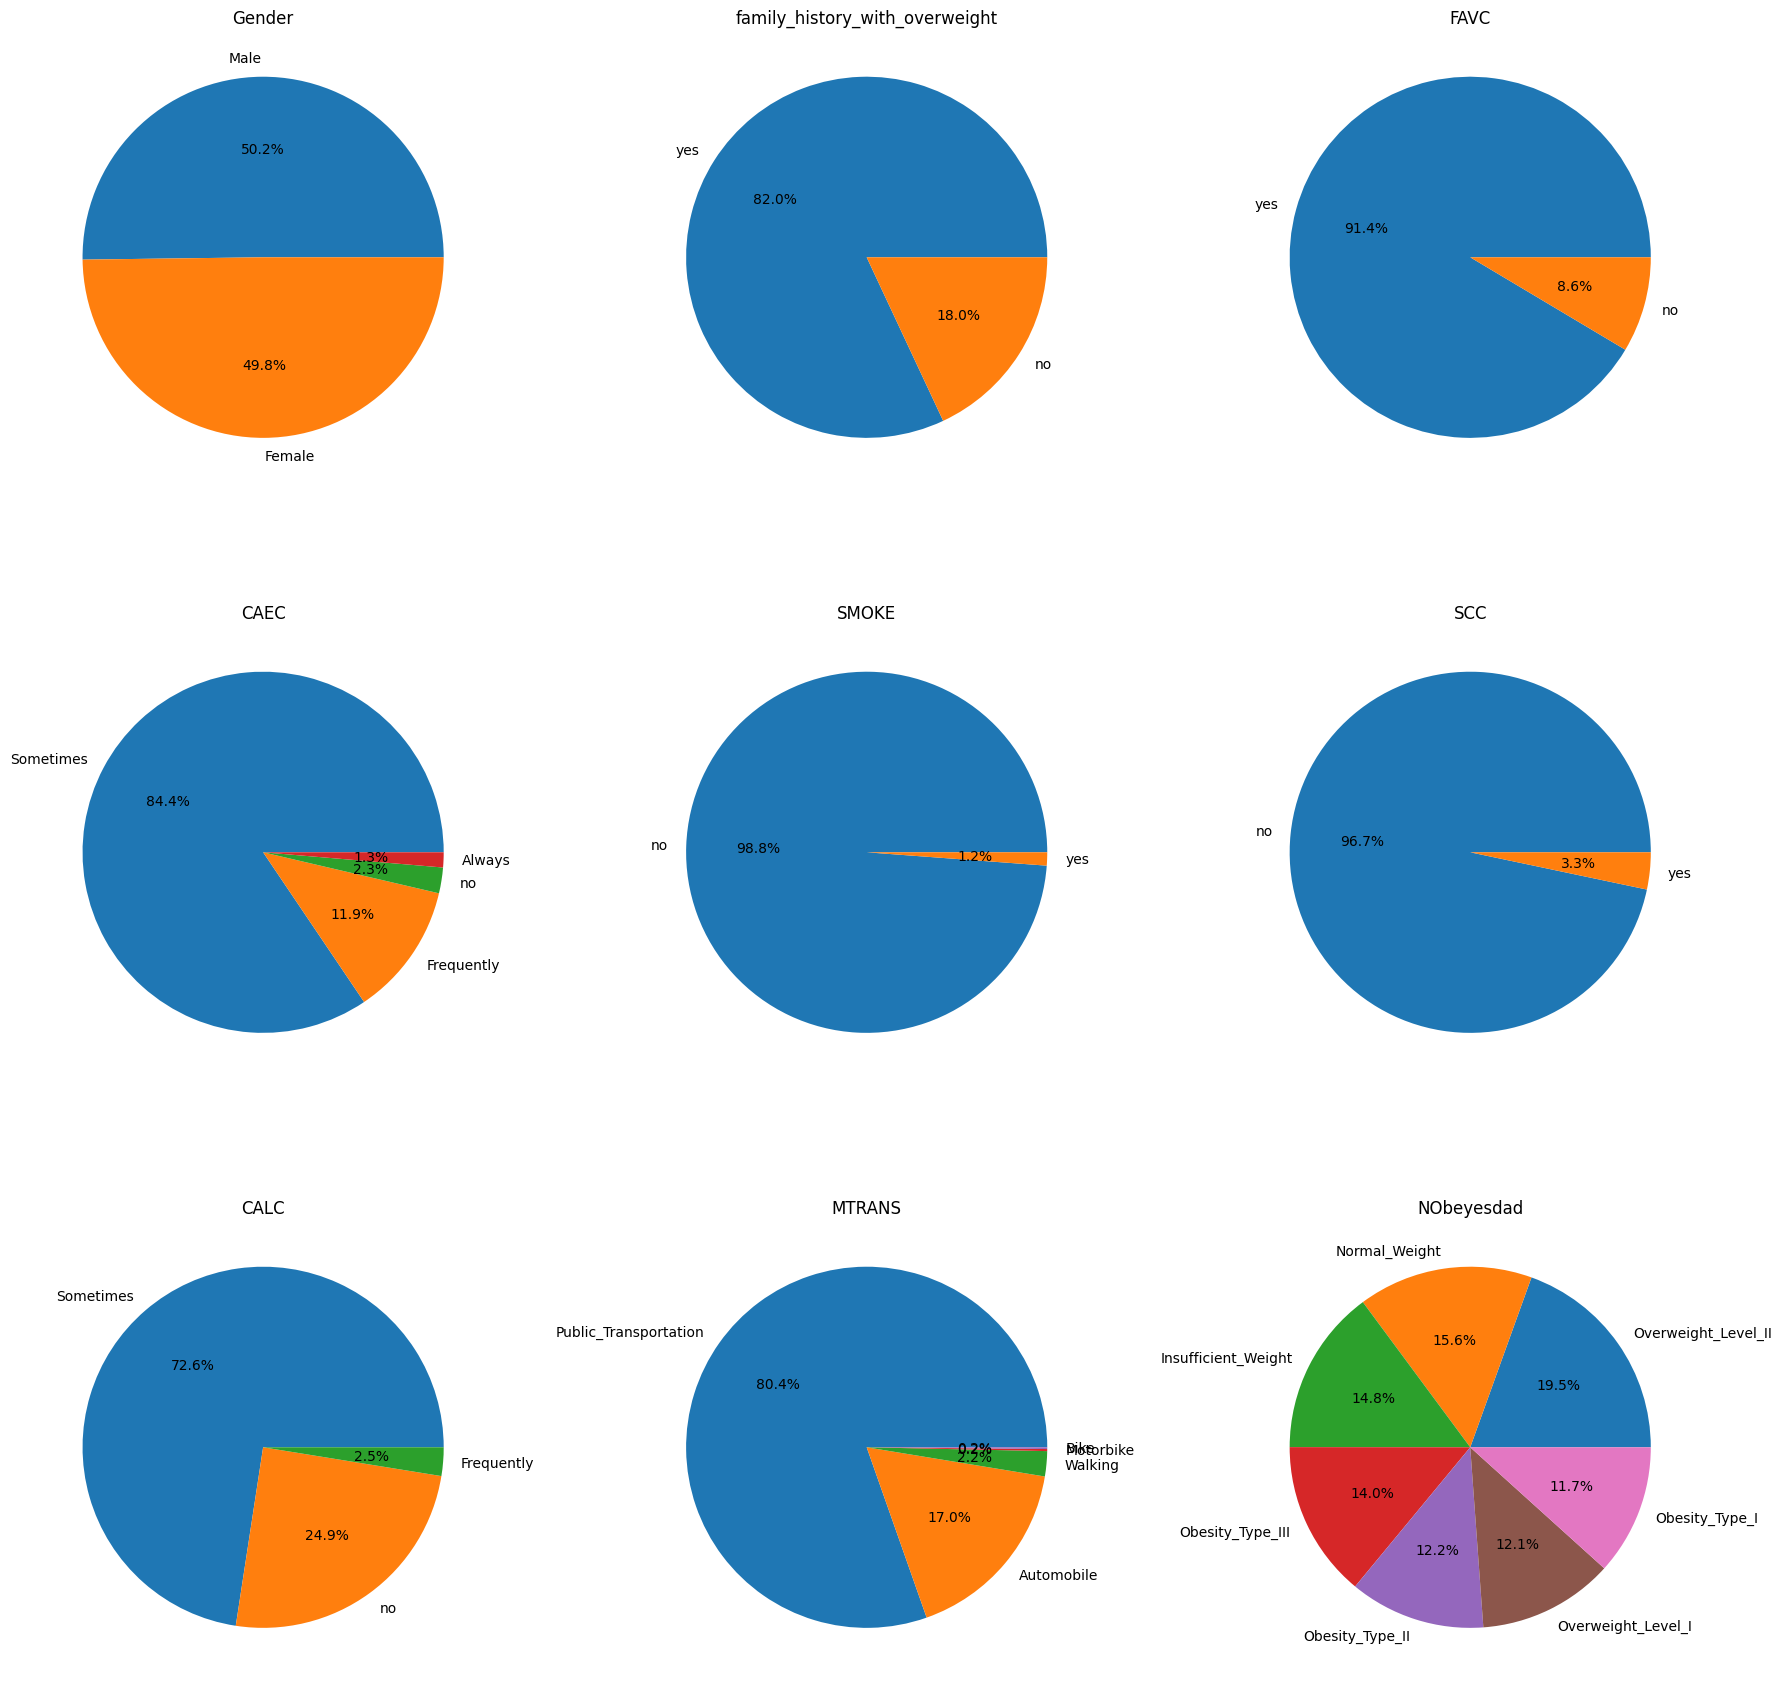

In [155]:
cat_cols = data.select_dtypes(include='object').columns
num_plots = len(cat_cols)
rows = int(np.ceil(num_plots / 3))
cols = min(3, num_plots)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 6 * rows))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    axes[i].pie(data[col].value_counts(), labels=data[col].unique(), autopct='%1.1f%%')
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

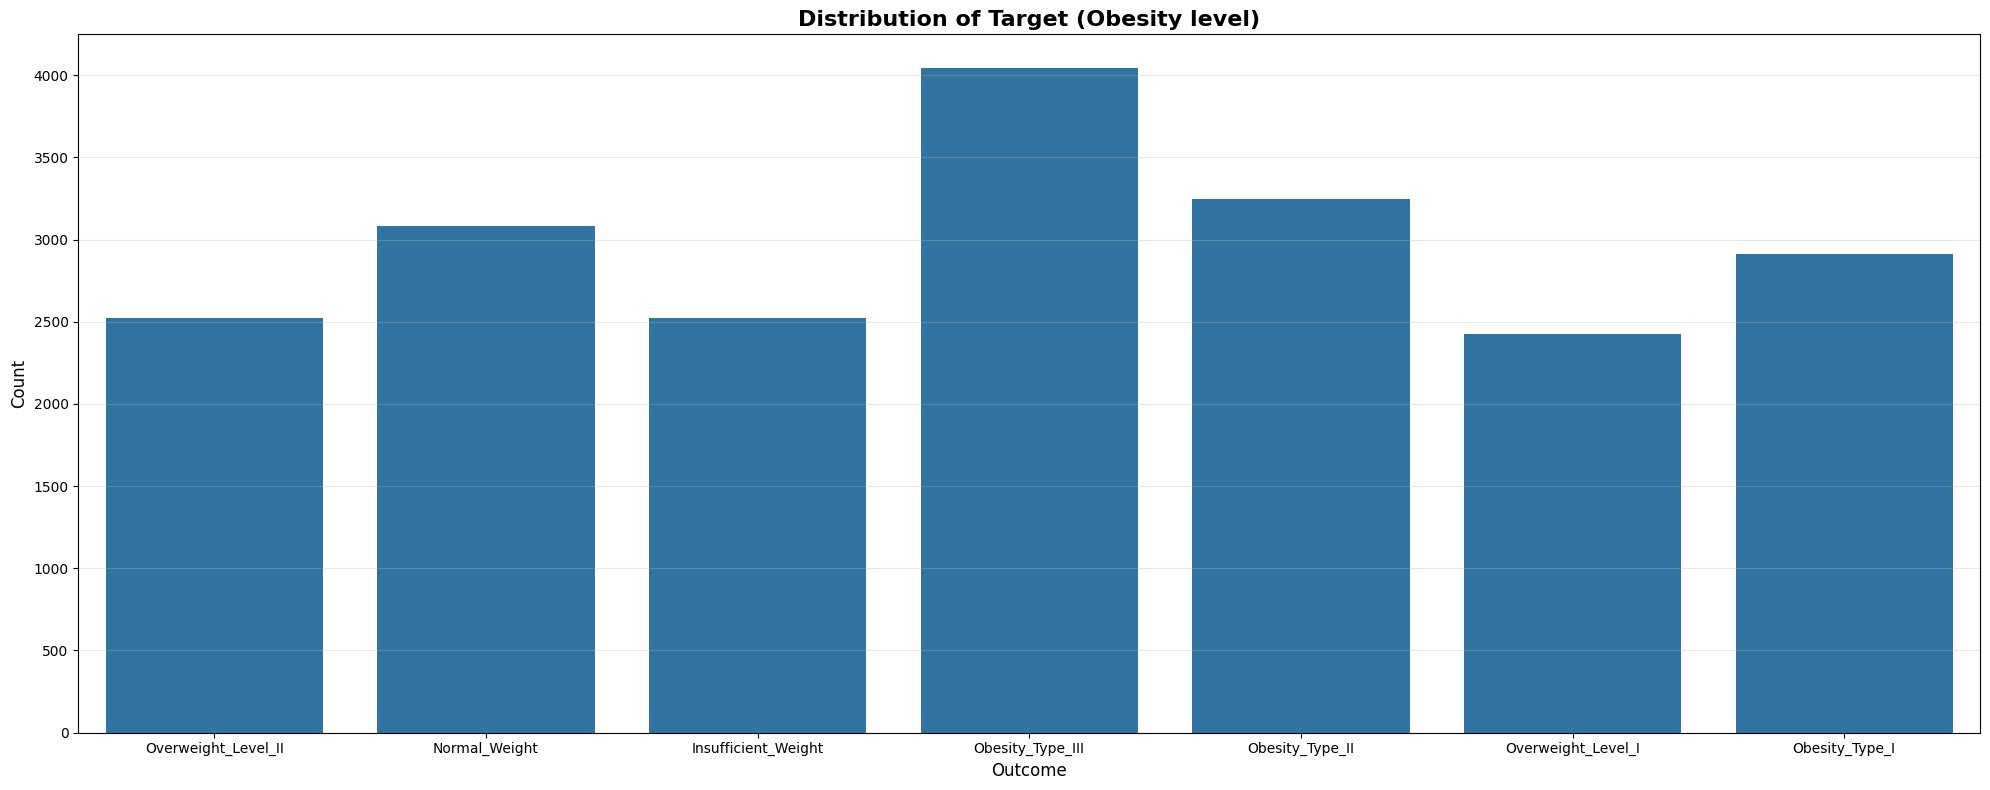

In [156]:
#target distribution
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='NObeyesdad')
plt.title('Distribution of Target (Obesity level)', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

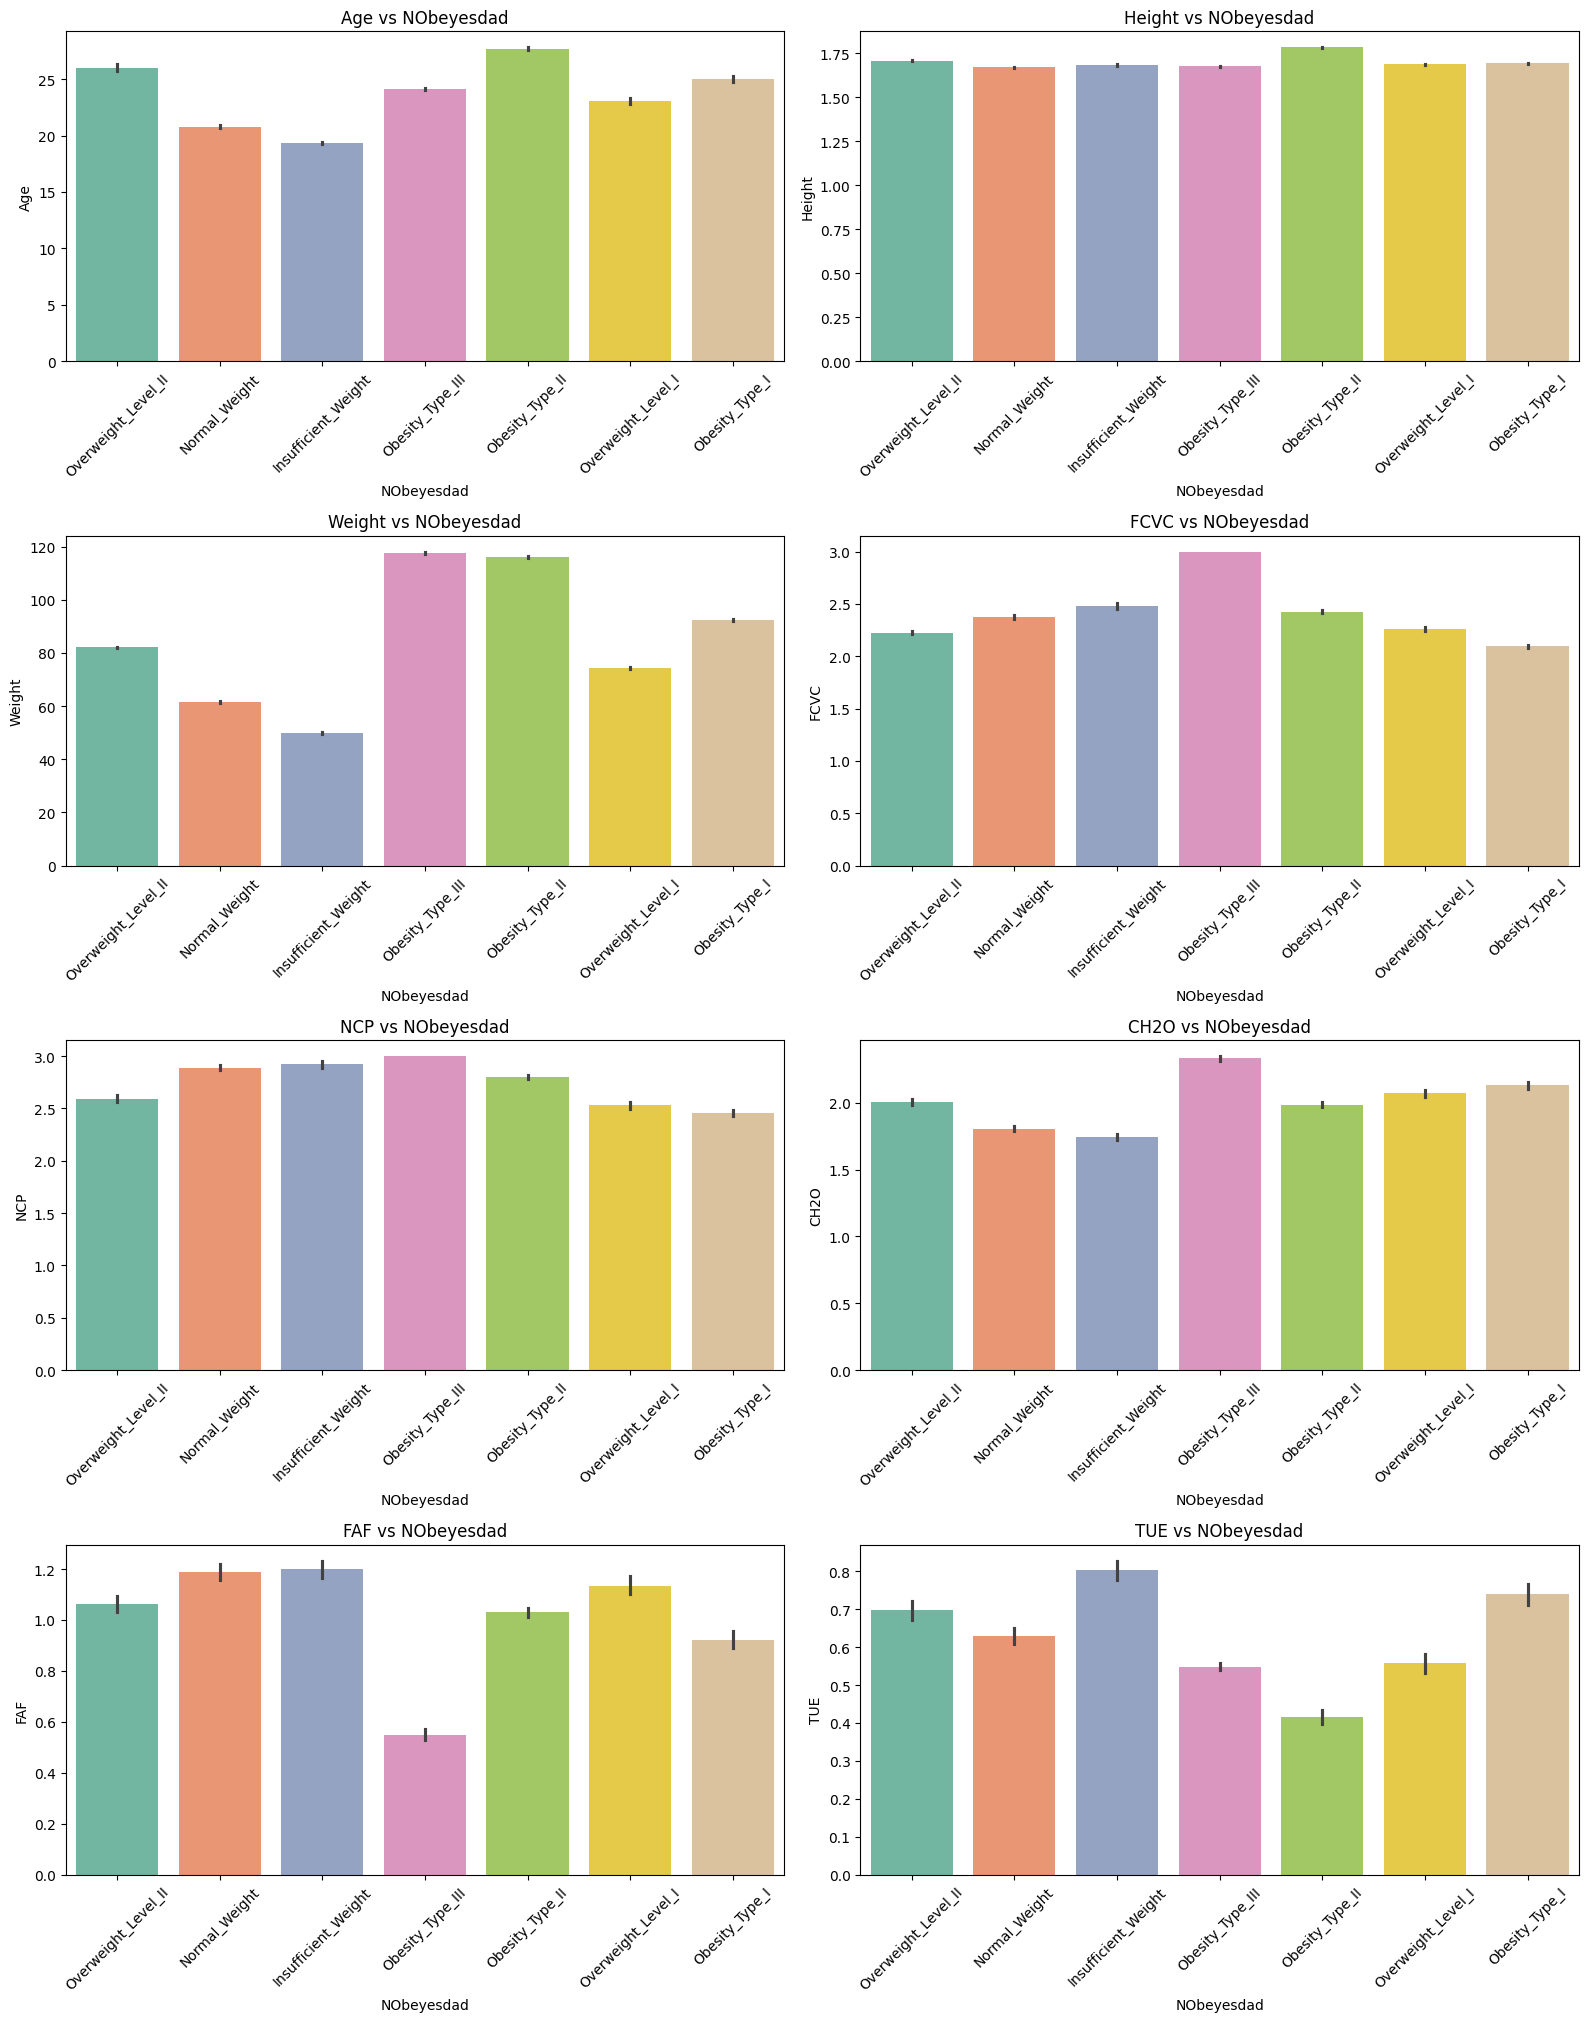

In [157]:
plt.figure(figsize=(16, 24))
for i, col in enumerate(data.select_dtypes("float64"), 1):
    plt.subplot(5, 2, i)
    sns.barplot(x='NObeyesdad', y=col, data=data,hue='NObeyesdad', palette='Set2', legend=False)
    plt.title(f'{col} vs NObeyesdad')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


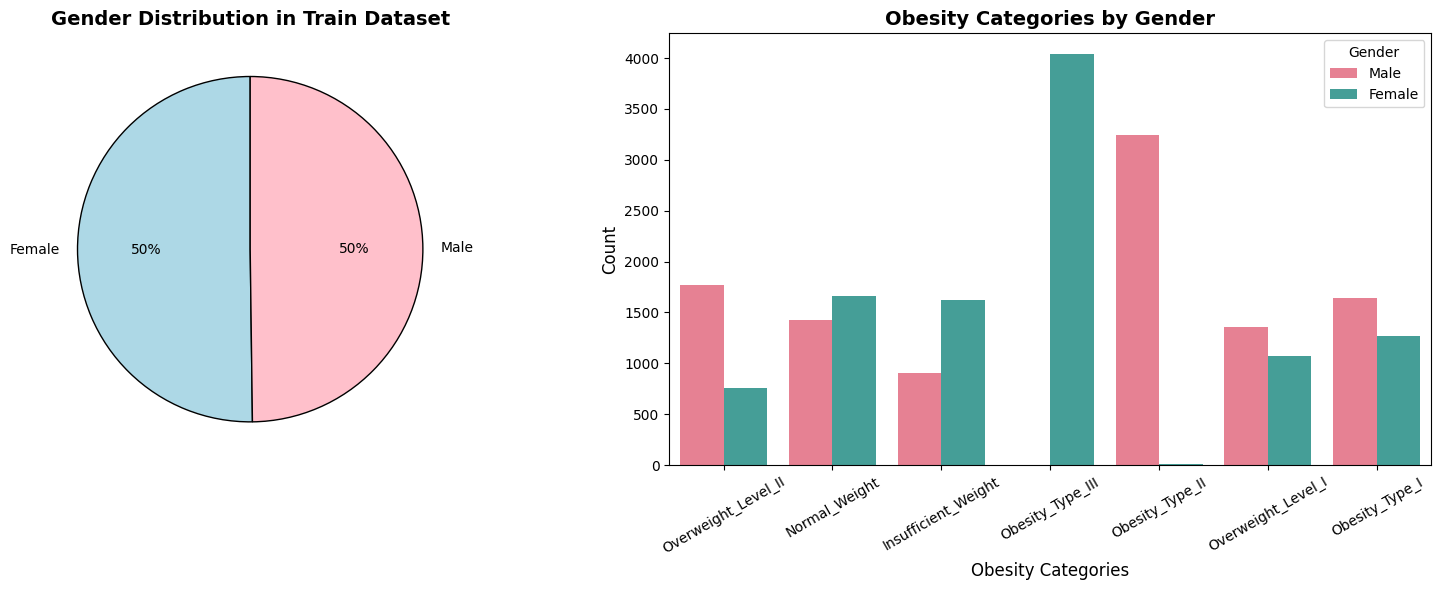

In [158]:
#Gender
gender_counts = data['Gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=['lightblue', 'pink'],
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title("Gender Distribution in Train Dataset", fontsize=14, fontweight='bold')

#Gender vs target distribution
sns.countplot(data=data, x='NObeyesdad', hue='Gender', palette='husl', ax=axes[1])
axes[1].set_title('Obesity Categories by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Obesity Categories', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Gender', loc='upper right')

axes[1].tick_params(axis='x', rotation=30, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

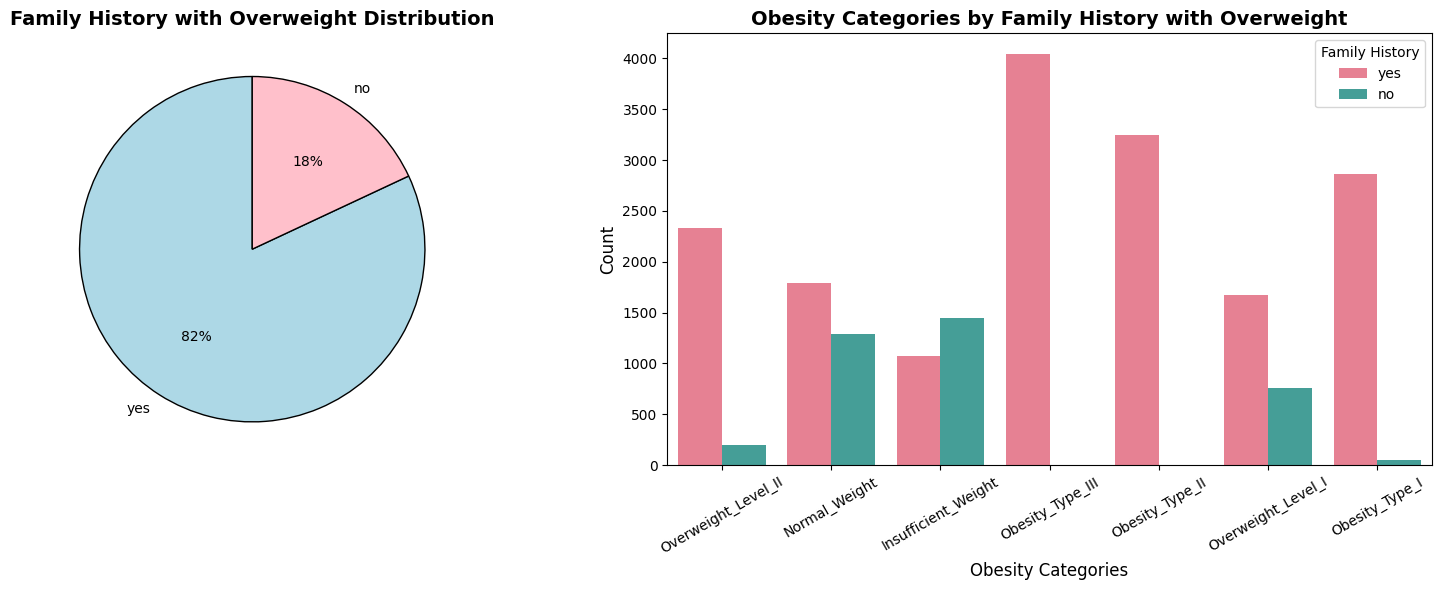

In [159]:
history_counts = data['family_history_with_overweight'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(
    history_counts,
    labels=history_counts.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=['lightblue', 'pink'],
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title("Family History with Overweight Distribution", fontsize=14, fontweight='bold')

sns.countplot(data=data, x='NObeyesdad', hue='family_history_with_overweight', palette='husl', ax=axes[1])
axes[1].set_title('Obesity Categories by Family History with Overweight', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Obesity Categories', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Family History', loc='upper right')

axes[1].tick_params(axis='x', rotation=30, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

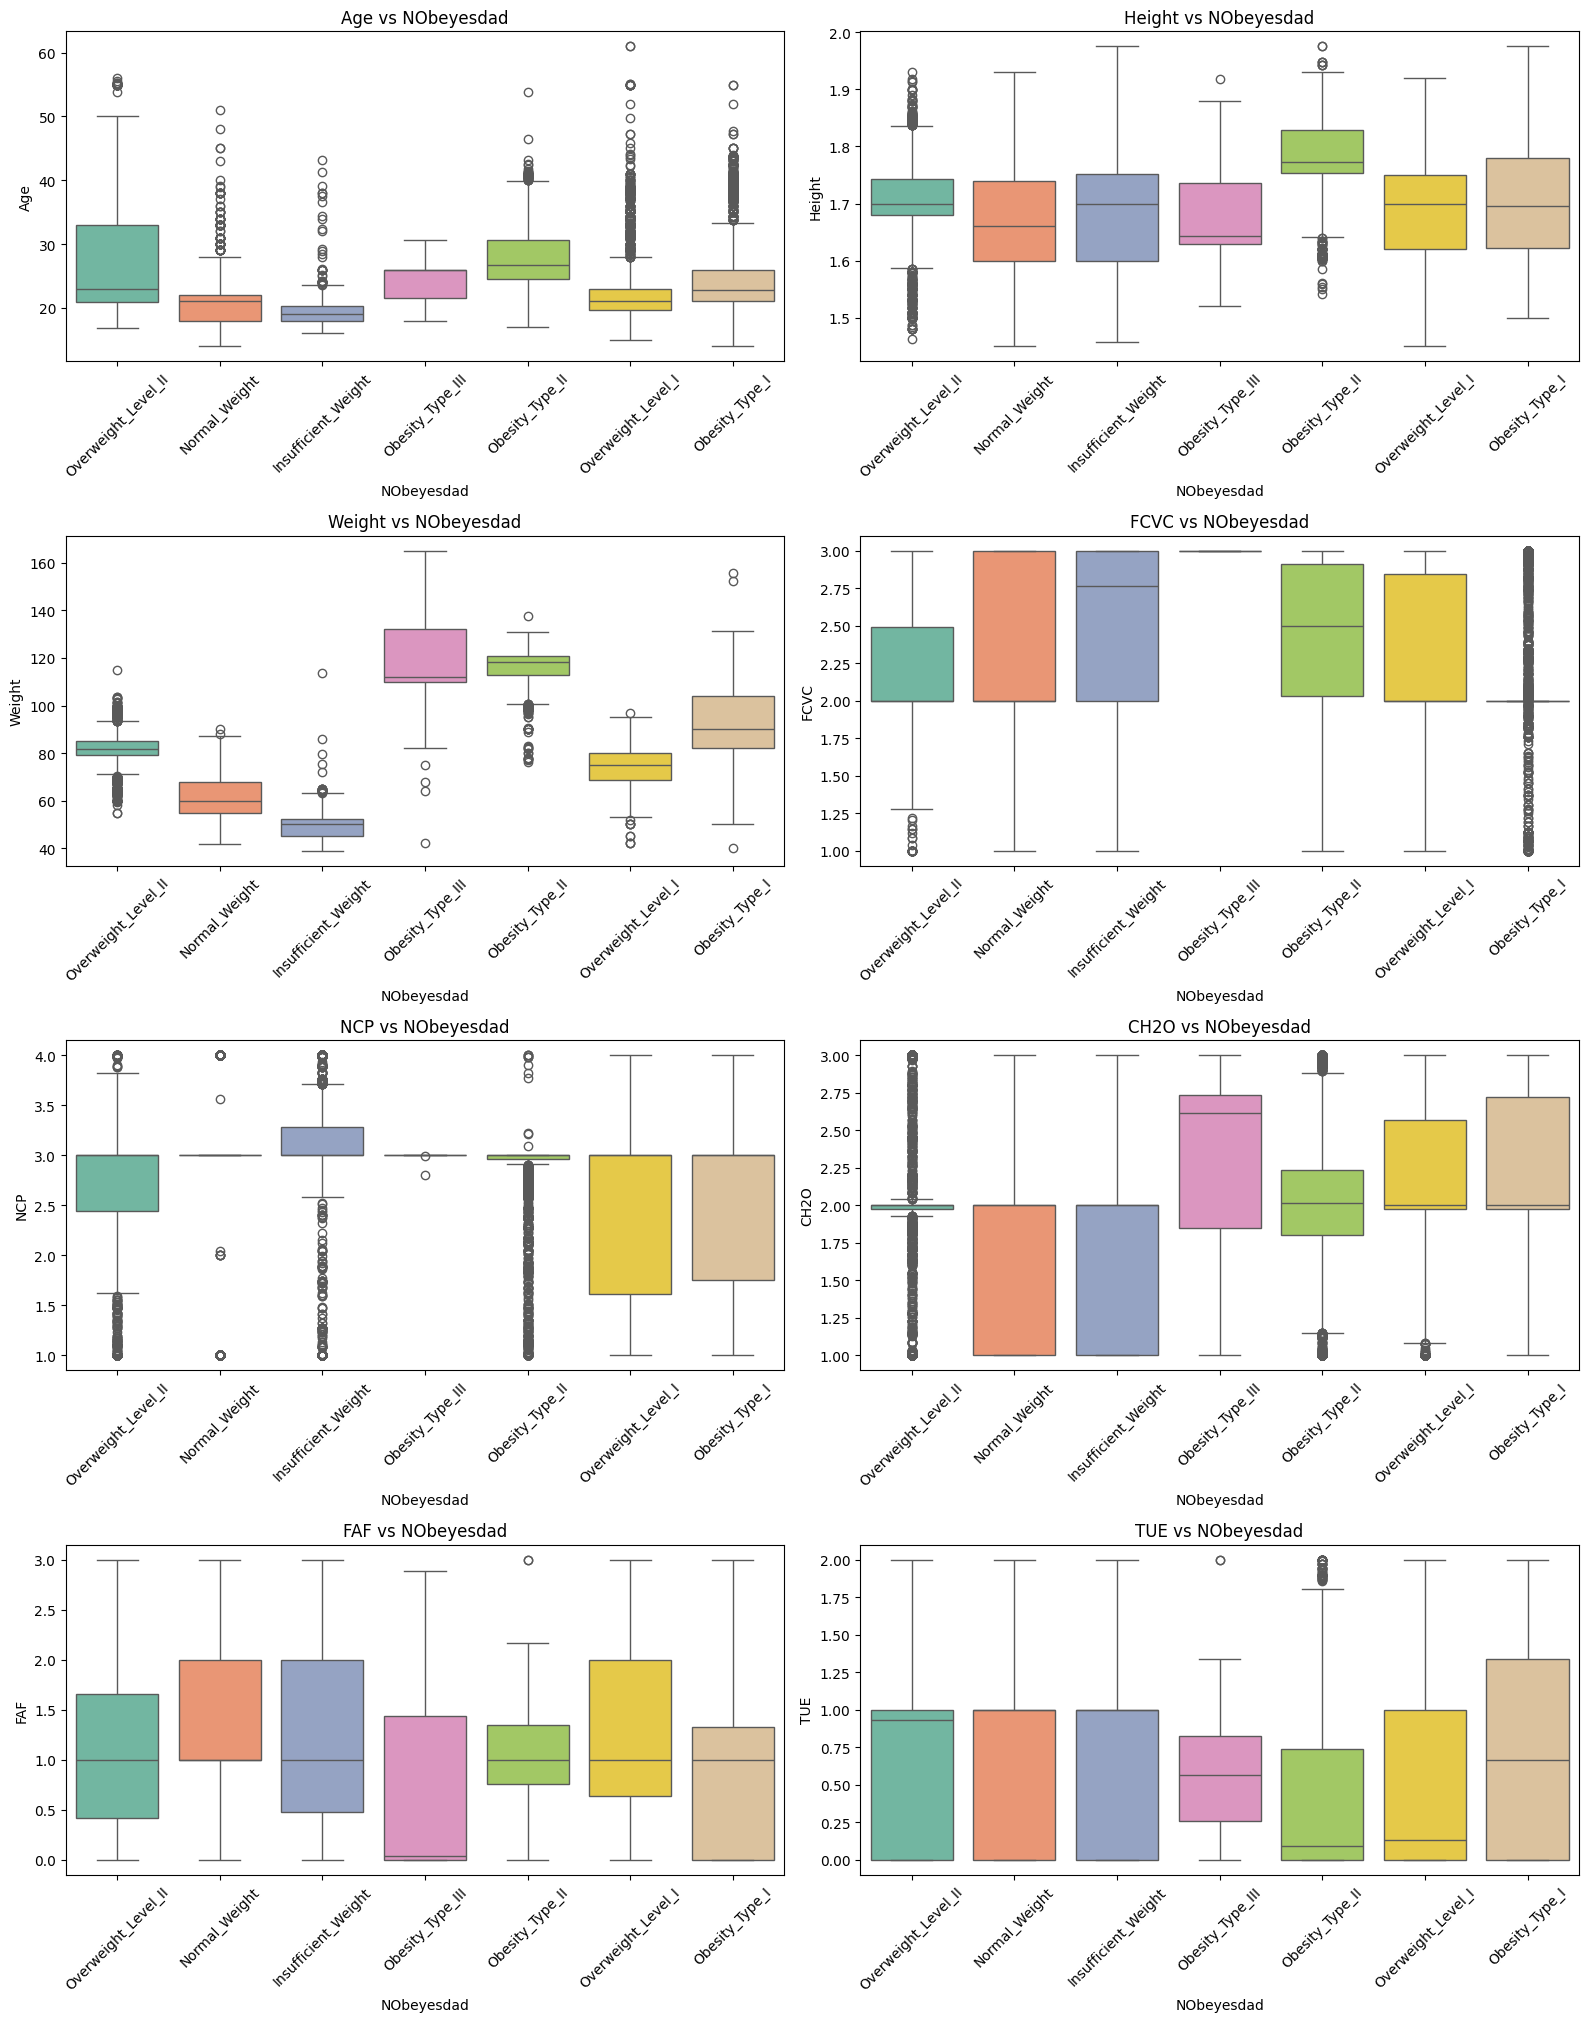

In [160]:
plt.figure(figsize=(16, 24))
for i, col in enumerate(data.select_dtypes("float64"), 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='NObeyesdad', y=col, data=data,hue='NObeyesdad', palette='Set2', legend=False)
    plt.title(f'{col} vs NObeyesdad')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
Q1 = data[data_num].quantile(0.20)
Q3 = data[data_num].quantile(0.80)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data[data_num] < lower_bound) | (data[data_num] > upper_bound)).sum()

# Display outlier counts
print(outliers)

id           0
Age       1001
Height       0
Weight       0
FCVC         0
NCP       5093
CH2O         0
FAF          0
TUE          0
dtype: int64


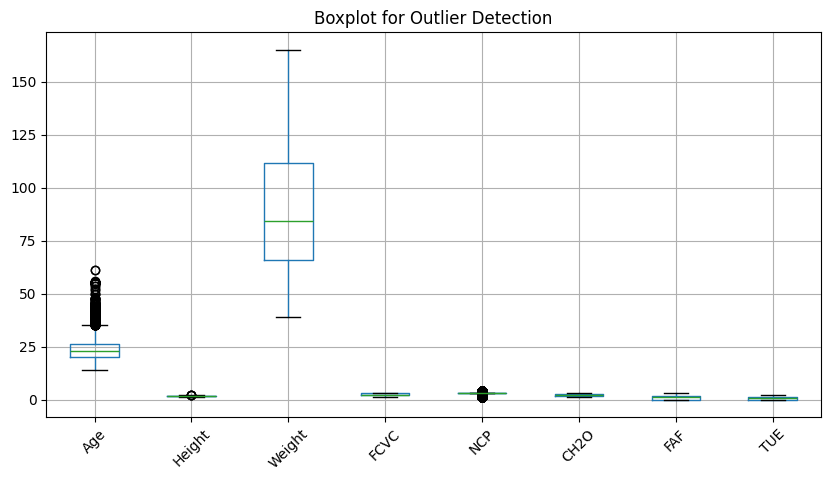

In [162]:
# list of numerical columns
data_num = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'id' from the list of numerical columns if it exists
if 'id' in data_num:
	data_num.remove('id')

# Create boxplots for each numerical feature
plt.figure(figsize=(10, 5))
data[data_num].boxplot(rot=45)  # Rotating labels for better readability
plt.title("Boxplot for Outlier Detection")
plt.show()


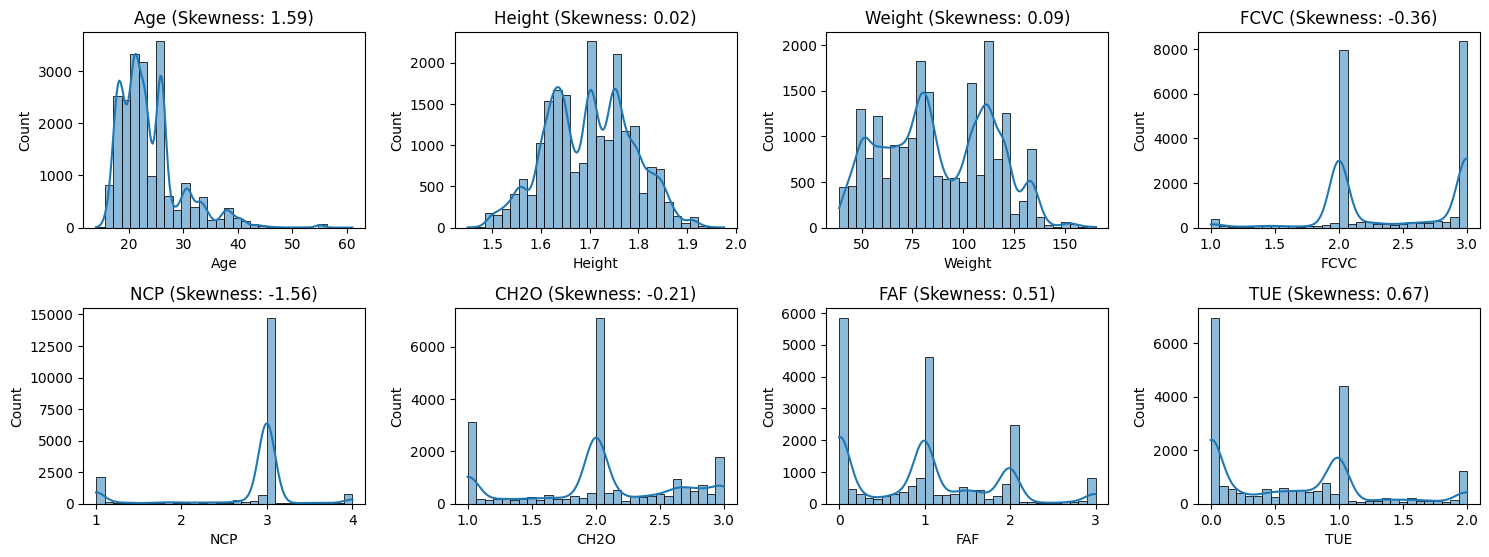

In [163]:
# Plot distribution for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(data_num):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'{col} (Skewness: {skew(data[col], nan_policy="omit"):.2f})')

plt.tight_layout()
plt.show()


In [164]:
data_cat = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'NObeyesdad' in data_cat:
	data_cat.remove('NObeyesdad')
for col in data_cat:
    print(f"{col}:\n{data[col].value_counts(normalize=True) * 100}\n{'-'*30}")

Gender:
Gender
Female    50.207149
Male      49.792851
Name: proportion, dtype: float64
------------------------------
family_history_with_overweight:
family_history_with_overweight
yes    81.96358
no     18.03642
Name: proportion, dtype: float64
------------------------------
FAVC:
FAVC
yes    91.444262
no      8.555738
Name: proportion, dtype: float64
------------------------------
CAEC:
CAEC
Sometimes     84.444551
Frequently    11.908662
Always         2.302727
no             1.344060
Name: proportion, dtype: float64
------------------------------
SMOKE:
SMOKE
no     98.819732
yes     1.180268
Name: proportion, dtype: float64
------------------------------
SCC:
SCC
no     96.690433
yes     3.309567
Name: proportion, dtype: float64
------------------------------
CALC:
CALC
Sometimes     72.579247
no            24.872338
Frequently     2.548415
Name: proportion, dtype: float64
------------------------------
MTRANS:
MTRANS
Public_Transportation    80.388284
Automobile               17

In [165]:
for col in data_cat:
    counts = data[col].value_counts()
    imbalance_ratio = counts.max() / counts.min()
    print(f"{col}: Imbalance Ratio = {imbalance_ratio:.2f}")


Gender: Imbalance Ratio = 1.01
family_history_with_overweight: Imbalance Ratio = 4.54
FAVC: Imbalance Ratio = 10.69
CAEC: Imbalance Ratio = 62.83
SMOKE: Imbalance Ratio = 83.73
SCC: Imbalance Ratio = 29.22
CALC: Imbalance Ratio = 28.48
MTRANS: Imbalance Ratio = 521.47


### Data Insights and Preprocessing Recommendations

### 1. Numerical Features Analysis
- **Age**: The `Age` column contains float numbers. We will round it to the nearest integer for better interpretability.
- **Height**: The `Height` column is likely recorded in meters. To make it more interpretable, we will convert it to centimeters (cm) by multiplying by 100.
- **Weight**: The `Weight` column appears fine and does not need transformation.
- **FCVC**: This feature is already in float format and does not require handling.
- **NCP**: The `NCP` (Number of main meals consumed daily) contains float values, which are not logical. We will convert it to integers.
- **CH2O**: Since the maximum value is 3, we assume this represents water intake in liters.
- **FAF**: This feature is float but represents the number of times a person engages in physical activity. We will round it to the nearest integer.
- **TUE**: The `TUE` (Time using electronic devices) is assumed to be in minutes, so we will convert float numbers to whole minutes.

---

### 2. Outliers Analysis
- **IQR-based outlier detection shows a high number of outliers in Age and NCP.**  
- **NCP** has extreme values beyond expected limits (e.g., 4+ meals per day). This might indicate data entry issues.  
- **Some features may need capping or transformation rather than outright removal.**  

---

### 3. Categorical Feature Imbalance
- **Gender**: Balanced distribution (Imbalance Ratio = 1.01), no handling needed.
- **family_history_with_overweight**: Some imbalance (4.54), but no major concern.
- **FAVC** (Frequent consumption of high-caloric food): Highly imbalanced (10.69), might need handling depending on the model.
- **CAEC** (Consumption of food between meals): Very imbalanced (62.83), possible handling required.
- **SMOKE**: Extremely imbalanced (83.73), could be ignored or combined into a single category.
- **SCC**: Some imbalance (29.22), might need handling.
- **CALC** (Alcohol consumption): Imbalanced (28.48), consider adjustments.
- **MTRANS** (Mode of transportation): Highly imbalanced (521.47), might require simplification or grouping.

---

### 4. Encoding & Handling Categorical Features  
- **One-Hot Encoding** may be useful for `MTRANS`.  
- **Ordinal Encoding** is applied to `CAEC` and `CALC` since they have an inherent order.  
- **Label Encoding** can be applied to binary features like `SMOKE` and `SCC`.  
- **Combining rare categories** in highly imbalanced features may improve model stability.

---

### 5. Considerations for Model Selection  
- **Decision Trees, Random Forest, or XGBoost** → Can handle categorical data well and are less sensitive to scaling.  


## Step 3: Data Preprocessing

### Handle Values

In [166]:
# Since Age represents a person's age, it should be an integer.
data['Age'] = np.round(data['Age'])

In [167]:
# Convert height from meters to centimeters.
data['Height'] = np.round(data['Height'] * 100)

In [168]:
# Since daily number of main meals, it should be an integer.
data['NCP'] = np.round(data['NCP'])

In [169]:
# We assume this represents water intake in liters. We will round it up to the nearest integer.
data['CH2O'] = np.ceil(data['CH2O'])

In [170]:
# number of times a person engages in physical activity. We will round it to the nearest integer.
data['FAF'] = np.round(data['FAF'])

In [171]:
# TUE (Time using electronic devices) is assumed to be in minutes,
# so we will convert float numbers to whole minutes.
data['TUE'] = np.round(data['TUE'] * 60)

In [173]:
# BMI
data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2

### Convert categorical variables

In [174]:
data_cat = data.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoding_categorical_feature = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "NObeyesdad"]
ordinal_encoding_categorical_feature = ["CAEC", "CALC"]
one_hot_encoding_categorical_feature = ["MTRANS"]

In [175]:
for col in label_encoding_categorical_feature:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [176]:
ordinal_categories = {
    "CAEC": ["no", "Sometimes", "Frequently", "Always"],
    "CALC": ["no", "Sometimes", "Frequently"]
}

ordinal_encoder = OrdinalEncoder(
    categories=[
        ordinal_categories[col] for col in ordinal_encoding_categorical_feature
    ]
)

# Fit and transform the encoder on the entire subset of columns at once
data[ordinal_encoding_categorical_feature] = ordinal_encoder.fit_transform(data[ordinal_encoding_categorical_feature])


In [177]:
# One-hot encode the 'MTRANS' column
# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the 'MTRANS' column
mtrans_encoded = ohe.fit_transform(data[['MTRANS']])

# Create a DataFrame for the encoded columns
mtrans_encoded_df = pd.DataFrame(mtrans_encoded, columns=ohe.get_feature_names_out(['MTRANS']))

# Concatenate the encoded columns back to the original DataFrame
data = pd.concat([data.reset_index(drop=True), mtrans_encoded_df.reset_index(drop=True)], axis=1)

# Drop the original 'MTRANS' column
data.drop(columns=['MTRANS'], inplace=True)

In [178]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.0,170.0,81.669950,1,1,2.000000,3.0,1.0,...,0.0,59.0,1.0,6,28.259498,0.0,0.0,0.0,1.0,0.0
1,1,0,18.0,156.0,57.000000,1,1,2.000000,3.0,2.0,...,1.0,60.0,0.0,1,23.422091,1.0,0.0,0.0,0.0,0.0
2,2,0,18.0,171.0,50.165754,1,1,1.880534,1.0,1.0,...,1.0,100.0,0.0,0,17.155964,0.0,0.0,0.0,1.0,0.0
3,3,0,21.0,171.0,131.274851,1,1,3.000000,3.0,1.0,...,1.0,47.0,1.0,4,44.894105,0.0,0.0,0.0,1.0,0.0
4,4,1,32.0,191.0,93.798055,1,1,2.679664,2.0,1.0,...,2.0,56.0,1.0,6,25.711481,0.0,0.0,0.0,1.0,0.0


In [179]:
data.drop(columns=['id'], inplace=True)

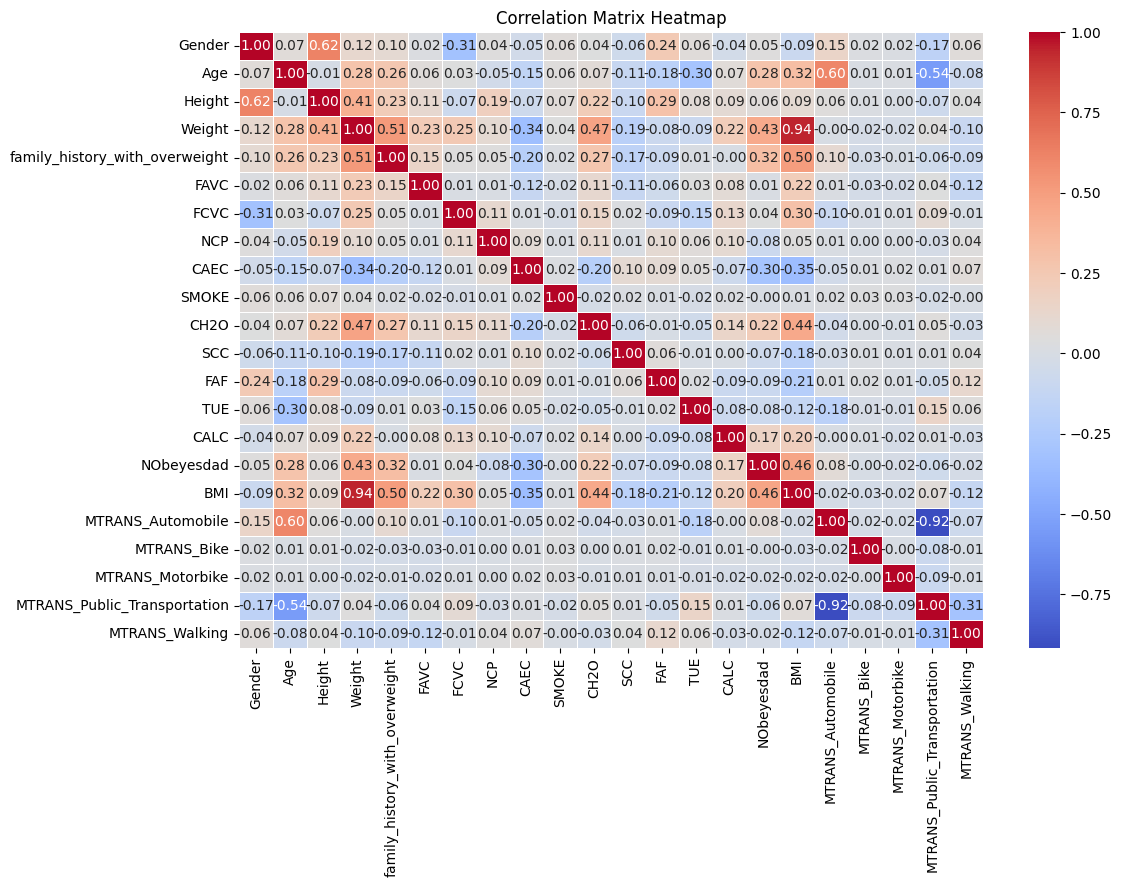

In [180]:
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Train-Test Split

In [181]:
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Choose a Model & Training


- **Tree-based models** (Random Forest, Decision Trees, XGBoost)
- **Tree-based models** are not affected by feature magnitudes because they split data based on conditions
- **Tree-based models** do not rely on the scale of numerical features.
- **Tree-based models** work good withh interpretability, small datasets, High-dimensional data


In [183]:
# Define models with pipelines
models = {
    "RandomForest": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    "DecisionTree": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    "XGBoost": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(eval_metric="mlogloss"))
    ]),
}

# Dictionary to store accuracy results
accuracy_results = {}
results = []

# Loop over models
for name, pipeline in models.items():
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Instantiate a KFold object
    kf = KFold(n_splits=5, random_state=12, shuffle=True)

    # Perform cross-validation
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kf)
    results.append(cv_results)

    # Store result
    accuracy_results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")



RandomForest Accuracy: 0.8981

DecisionTree Accuracy: 0.8509

XGBoost Accuracy: 0.9022


Cross-validation results: [array([0.90036123, 0.90304125, 0.89732008, 0.90153568, 0.89039446]), array([0.83654425, 0.83197832, 0.83649503, 0.83950617, 0.83679615]), array([0.90457556, 0.90243902, 0.90003011, 0.90725685, 0.89611563])]


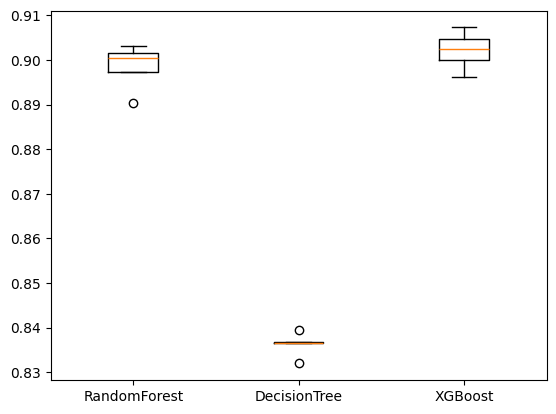

In [184]:
plt.boxplot(results, tick_labels=models.keys())
print("Cross-validation results:", results)
plt.show()

### Based on the accuracy comparison, the model **`"XGBoost"`** has a maximum accuracy of **0.9022**. So we will choose this model since it is the best  model fit for our data.

In [185]:
# Hyperparameter Tuning for XGBoost
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "gamma": [0, 0.1, 0.3, 0.5],
    "reg_lambda": [0.1, 1, 10],
    "reg_alpha": [0, 0.1, 1]
}

# Initialize XGBoost model
xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_grid,
    n_iter=10, scoring="accuracy",
    cv=5, verbose=2, n_jobs=-1, random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate with best model
best_xgb = random_search.best_estimator_
accuracy = best_xgb.score(X_test, y_test)
print("Tuned XGBoost Accuracy:", accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0}
Tuned XGBoost Accuracy: 0.9082369942196532


In [186]:
eval_set = [(X_train, y_train), (X_test, y_test)]
best_xgb.fit(X_train, y_train, eval_set=eval_set, verbose=False)
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9082369942196532


## Step 6: Model Evaluation & visualization

In [187]:
# Print classification report
print(f"Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.89      0.89      0.89       626
           2       0.89      0.88      0.89       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.80      0.80      0.80       484
           6       0.81      0.82      0.81       514

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



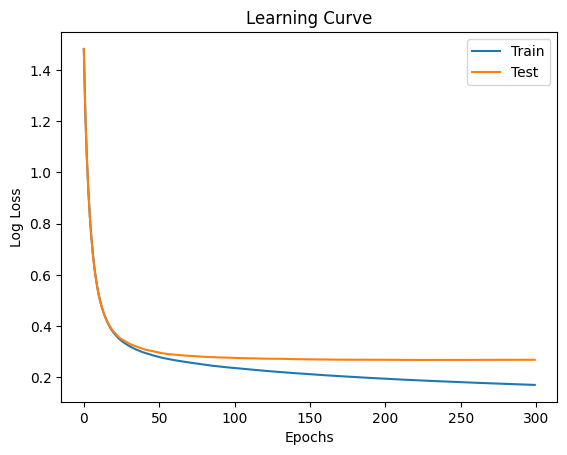

In [188]:
results = best_xgb.evals_result()
epochs = len(results['validation_0']['mlogloss'])

plt.plot(range(epochs), results['validation_0']['mlogloss'], label='Train')
plt.plot(range(epochs), results['validation_1']['mlogloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

[[493  27   0   0   0   2   2]
 [ 25 558   0   0   0  37   6]
 [  2   1 479  12   1  12  36]
 [  0   0  17 635   3   0   2]
 [  0   0   0   1 802   0   1]
 [  1  35  10   0   0 385  53]
 [  0   9  33   5   0  48 419]]


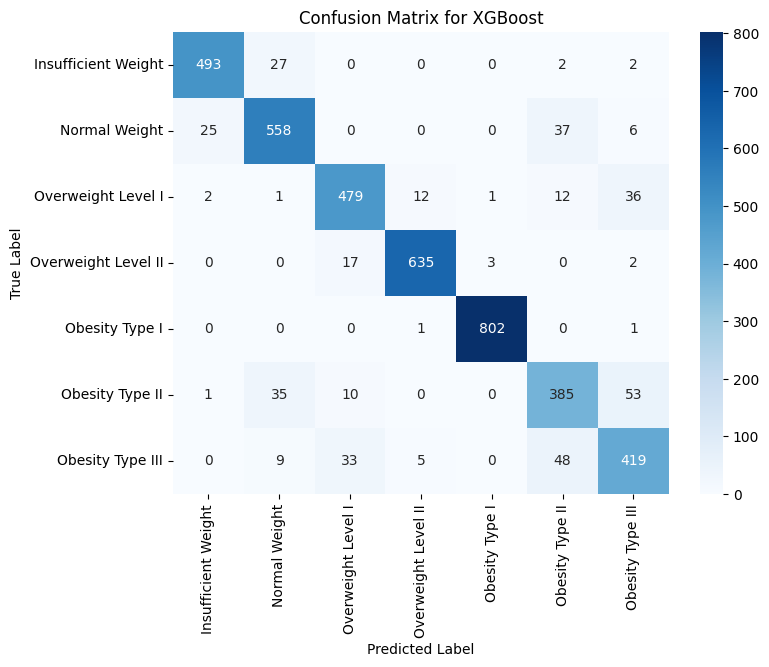

In [189]:
# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)

class_labels = ["Insufficient Weight", "Normal Weight", "Overweight Level I",
                "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost")

# Show the plot
plt.show()

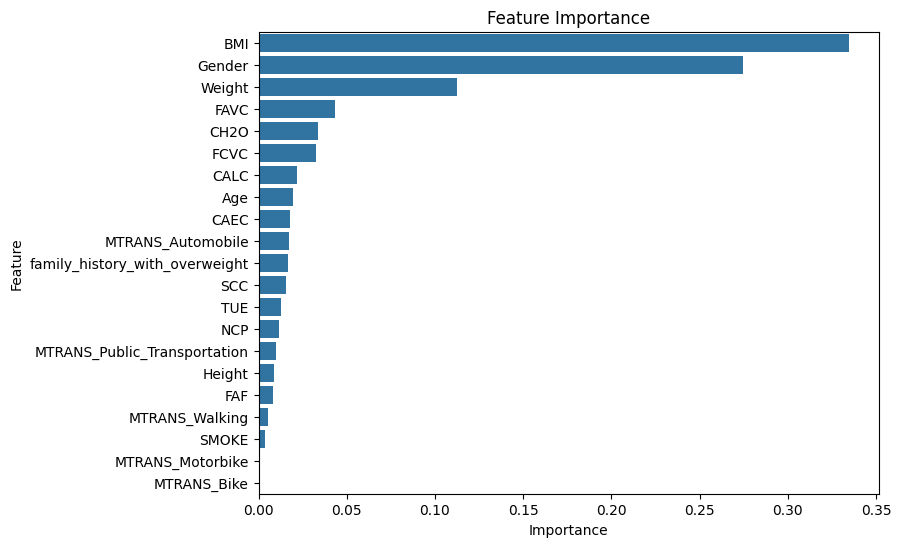

In [190]:
# Extract feature importance
feature_importance = best_xgb.feature_importances_

# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance")
plt.show()